In [2]:
import numpy as np
from matplotlib import pyplot as plt
from juliacall import Main as jl

In [3]:
# Check what directory Julia is workout out of
jl.pwd()

'/Users/morty/Library/CloudStorage/Dropbox/code/vorpy'

In [4]:
# Activate the Julia environment of the current
# directory.
# If Julia's working directory is
# '/home/user1/Dropbox/code/vorpy',
# then the following will work.
jl.Pkg.activate('.')

  Activating project at `~/Library/CloudStorage/Dropbox/code/vorpy`


In [5]:
# Show the packages in the current Julia
# environment. (This also helps to check
# that we are using the right environment.)
jl.Pkg.status()

Status `~/Library/CloudStorage/Dropbox/code/vorpy/Project.toml`
  [6e4b80f9] BenchmarkTools v1.4.0
  [052768ef] CUDA v5.2.0
⌃ [de52edbc] Integrals v4.1.0
⌃ [91a5bcdd] Plots v1.39.0
⌃ [90137ffa] StaticArrays v1.9.2
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [6]:
# Run the Julia script to load the Biot-Savart
# function.
# jl.include('julia_src/biot_savart.jl')  # CPU version
jl.include('julia_src/biot_savart_cuda.jl')  # GPU version

JuliaError: SystemError: opening file "/Users/morty/Library/CloudStorage/Dropbox/code/vorpy/julia_src/biot_savart_cuda.jl": No such file or directory
Stacktrace:
  [1] systemerror(p::String, errno::Int32; extrainfo::Nothing)
    @ Base ./error.jl:176
  [2] systemerror
    @ ./error.jl:175 [inlined]
  [3] open(fname::String; lock::Bool, read::Nothing, write::Nothing, create::Nothing, truncate::Nothing, append::Nothing)
    @ Base ./iostream.jl:293
  [4] open
    @ ./iostream.jl:275 [inlined]
  [5] open(f::Base.var"#433#434"{String}, args::String; kwargs::@Kwargs{})
    @ Base ./io.jl:394
  [6] open
    @ ./io.jl:393 [inlined]
  [7] read
    @ ./io.jl:486 [inlined]
  [8] _include(mapexpr::Function, mod::Module, _path::String)
    @ Base ./loading.jl:2132
  [9] include(fname::String)
    @ Base.MainInclude ./client.jl:489
 [10] pyjlany_call(self::typeof(include), args_::Py, kwargs_::Py)
    @ PythonCall ~/.julia/packages/PythonCall/wXfah/src/jlwrap/any.jl:37
 [11] _pyjl_callmethod(f::Any, self_::Ptr{PythonCall.C.PyObject}, args_::Ptr{PythonCall.C.PyObject}, nargs::Int64)
    @ PythonCall ~/.julia/packages/PythonCall/wXfah/src/jlwrap/base.jl:69
 [12] _pyjl_callmethod(o::Ptr{PythonCall.C.PyObject}, args::Ptr{PythonCall.C.PyObject})
    @ PythonCall.C ~/.julia/packages/PythonCall/wXfah/src/cpython/jlwrap.jl:47

In [11]:
###############################################
# Test the Biot-Savart function with a simple
# example.
# Consider a very long straight vortex line
# aligned with the x-axis. We will calculate
# the velocity at the origin and along the
# y-axis.
#
# ~2:30 min for 100 segments and 10e6 field
# points
# ~0:15 min for 100 segments and 1e6 field
# Fewer segments but lots of field points
# is faster.
# Code scales like O(N) for field path
# segments (because we loop through each
# path segments).
###############################################

for i in range(10):
    print('Iteration: ', i)
    # Vortex line parameter
    NUMSEGS = 100
    # Field point parameter
    NUMFPS = 1_000_000

    vpps = np.zeros((NUMSEGS+1, 3))
    vpps[:, 0] = np.linspace(-1000, 1000, NUMSEGS+1)
    vcrds = np.ones(NUMSEGS+1) * 2
    vcirs = np.ones(NUMSEGS) * 1

    fps = np.zeros((NUMFPS, 3))
    fps[:, 1] = np.linspace(0, 20, NUMFPS)
    fps[0, 1] = 1e-3

    vel_num = np.transpose(jl.bs_solve(fps.T, vpps.T, vcrds, vcirs))
    print('Shape of returned velocity array: ', np.shape(vel_num))


Iteration:  0
Shape of returned velocity array:  (1000000, 3)
Iteration:  1
Shape of returned velocity array:  (1000000, 3)
Iteration:  2
Shape of returned velocity array:  (1000000, 3)
Iteration:  3
Shape of returned velocity array:  (1000000, 3)
Iteration:  4
Shape of returned velocity array:  (1000000, 3)
Iteration:  5
Shape of returned velocity array:  (1000000, 3)
Iteration:  6
Shape of returned velocity array:  (1000000, 3)
Iteration:  7
Shape of returned velocity array:  (1000000, 3)
Iteration:  8
Shape of returned velocity array:  (1000000, 3)
Iteration:  9
Shape of returned velocity array:  (1000000, 3)


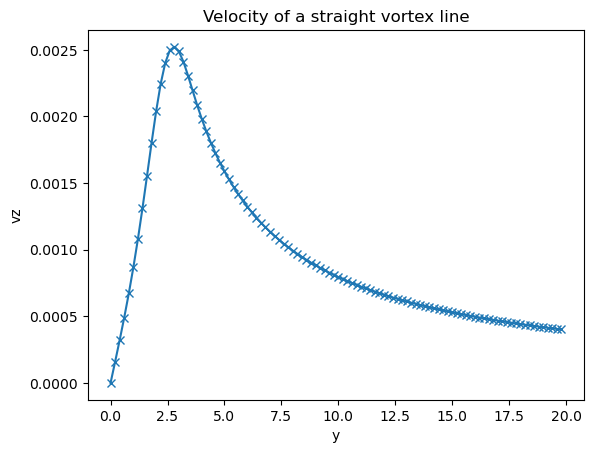

In [13]:
# Plot the magnitude of the velocity
# along the y-axis

stride = slice(1, -1, 10_000)
plt.plot(fps[stride, 1], vel_num[stride, -1], 'x-')
plt.xlabel('y')
plt.ylabel('vz')
plt.title('Velocity of a straight vortex line')
plt.show()